In [1]:
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import gc
from openai import OpenAIError, RateLimitError

from matplotlib import rcParams
# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 설정
rcParams['axes.unicode_minus'] = False     # 음수 기호 문제 해결

In [2]:
# APIKEY 정의
api_key = "" # dybaek9_1
client = OpenAI(api_key=api_key)

In [3]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [4]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사
0,2.100101e+06,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10개월만에 문고리 실세 이재만 안봉근 법정 나와 청문회불출석 인정 두문불...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,두문불출 10개월 만에 문고리 실세 이재 만 안봉근 법정 청문회불출석 인정 두문불출...,두문불출 10 개월 만 문고리 실세 이재 만 알 ㄴ 봉 근 법정 나오 청문회 불 출...,두문불출 10 개월 만 문고리 실세 이재만 안 봉 근 법정 나오 청문회 불 출석 인...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,두문불출 개월 문고리 실세 이재만 안 봉 근 법정 청문회 출석 인정 두문불출 개월 ...
1,2.100101e+06,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울고법 형사 13부에 배당 이달중 첫 기일 이재용 항소심 13부 서...,이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...,이재용 항소심 서울고법 형사 13부 배당 이달 중 첫 기 ㄹ 이재용 항소심 13부 ...,이재 용 항소심 서울 고법 형사 13 부 배당 이달 중 첫 기일 이재 용 항소심 1...,이재용 항소심 서울고법 형사 13 부 배당 이달 중 첫 기일 이재용 항소심 13 부...,이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...,이재용 항소심 서울고법 형사 부 배당 이달 중 기일 이재용 항소심 부 서울고법 형사...
2,2.100101e+06,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실게이트 청문회 불출석 11인 중 8명 백수 불출석 최순실게이트 청문회 백수 문...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,최순실게이트 청문회 불출석 11 ㄴ 중 8명 백수 불출석 최순실게이트 청문회 백수 ...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백 수 불 출석 최 순 실 게...,최순 실 게이트 청문회 불 출석 11 ㄴ 중 8 명 백수 불 출석 최순 실 게이트 ...,최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,최순 실 게이트 청문회 출석 중 명 백수 출석 최순 실 게이트 청문회 백수 문고리 ...
3,2.100101e+06,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사13부 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,삼성 뇌물 이재용 항소심 신설 형사13부 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재 용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재 용 항소심...,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재용 항소심 신설 형사 부 배당 삼성 뇌물 신설 이재용 항소심 형사 배...
4,2.100311e+06,2017-09-01,서울경제,진동영 기자,'이재용 항소심' 서울고법 형사13부가 맡는다,사회>사건_사고,사회>미디어,사회>여성,범죄>정치>뇌물수수,NaN,...,http://www.sedaily.com/NewsView/1OKUXEPQOP,NaN,"'이재용 항소심' 서울고법 형사13부가 맡는다 이재용,항소심,서울고법,형사,한명숙,...",이재용 항소심 서울고법 형사13부가 맡는다 이재용 항소심 서울고법 형사 한명숙 판결...,이재용 항소심 서울 고법 형사 13 부가 맡는다 이재용 항소심 서울 고법 형사 한명...,이재용 항소심 서울고법 형사13부 맡 는다 이재용 항소심 서울고법 형사 한명숙 판결...,이재 용 항소심 서울 고법 형사 13 부 맡 는 다 이재 용 항소심 서울 고법 형사...,이재용 항소심 서울고법 형사 13 부 맡 는다 이재용 항소심 서울고법 형사 한명숙 ...,이재용 항소심 서울고법 형사 13 이재용 항소심 서울고법 형사 한명숙 판결 뇌물 공...,이재용 항소심 서울고법 형사 부 이재용 항소심 서울고법 형사 한명숙 판결 뇌물 공여...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,2.100601e+06,2024-08-26,한국경제,이해성,"삼성전자 기흥 피폭 작업자, 손에 기준치의 188배 피폭",사회>사회일반,IT_과학>과학,NaN,NaN,NaN,...,https://www.hankyung.com/article/202408266335i,NaN,"삼성전자 기흥 피폭 작업자, 손에 기준치의 188배 피폭 삼성전자,기흥,피폭,작업자...",삼성전자 기흥 피폭 작업자 손에 기준치의 188배 피폭 삼성전자 기흥 피폭 작업자 ...,삼성 기흥 피폭 작업 손 기준 치의 188 배 피폭 삼성 기흥 피폭 작업 기 준치 ...,삼성전자 기흥 피폭 작업자 손 기준치 188배 피폭 삼성전자 기흥 피폭 작업자 기준...,삼성전자 기흥 피폭 작업자 손 기준치 188 배 피폭 삼성전자 기흥 피폭 작업자 기...,삼성전자 기흥 피폭 작업자 손 기준 치 188 배 피폭 삼성전자 기흥 피폭 작업자 ...,삼성전자 기흥 피폭 작업자 기준 188 피폭 삼성전자 기흥 피폭 작업자 기준 피폭 ...,삼성전자 기흥 피폭 작업자 손 기준 배 피폭 삼성전자 기흥 피폭 작업자 기준 피폭 ...
6056,2.100601e+06,2024-08-26,한국경제,오현우,수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다,사회>의료_건강,IT_과학>과학,NaN,NaN,NaN,...,https://www.hankyung.com/article/2024082667731,NaN,"수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다 수술,이송,재활,로봇,의료대,걱...",수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다 수술 이송 재활 로봇 의료대 걱...,수술 이송 재활 다 하는 로봇 의료 대란 걱정 덜었다 수술 이송 재활 로봇 의료 대...,수술 이송 재활 다 는 로봇 의

In [5]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사'],
      dtype='object')

In [6]:
df_bigkinds['제목_키워드_전처리후_Okt']

0       두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...
1       이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...
2       최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...
3       삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...
4       이재용 항소심 서울 고법 형사 13 부가 맡는다 이재용 항소심 서울 고법 형사 한명...
                              ...                        
6055    삼성 기흥 피폭 작업 손 기준 치의 188 배 피폭 삼성 기흥 피폭 작업 기 준치 ...
6056    수술 이송 재활 다 하는 로봇 의료 대란 걱정 덜었다 수술 이송 재활 로봇 의료 대...
6057    부음 금선 씨 별세 외 금선 별세 금선 별세 유경 상 부산 남구 장애인 복지관 장 ...
6058    부고 유영상 SK 텔레콤 대표 모친상 유영상 SK 텔레콤 대표 모친상 금선 별세 유...
6059    삼성 노조 실패한 파업 재 시동 교섭 권 확보 꼼수 삼성 노조 실패 파업 재 시동 ...
Name: 제목_키워드_전처리후_Okt, Length: 6060, dtype: object

In [7]:
# chatgpt - 원래 소스 대비 10배 빨라지며 50개 샘플링으로 테스트시 sentiments 동일/predicted_texts는 상이할 수 있으나
# 원래 소스도 재실행시 상이
# 개선사항
# 1. 병렬 처리: ThreadPoolExecutor를 사용하여 동시에 여러 요청을 보낼 수 있도록 했습니다. 이렇게 하면 처리 속도가 병목 현상 없이 크게 개선됩니다.
# 2. 딜레이 최적화: RateLimitError가 발생할 때 10초를 기다리는 대신, 1초 대기 후 재시도하도록 수정했습니다. 이렇게 하면 딜레이로 인한 비효율을 줄일 수 있습니다.
# 3. 오류 처리: RateLimitError 외의 예외가 발생할 경우도 안전하게 처리하여 실행이 중단되지 않도록 했습니다.
# 4. 결과 정리: sentiments와 predicted_texts 리스트를 오류 없이 저장할 수 있도록 수정했습니다.

import concurrent.futures
import time
from tqdm import tqdm

def analyze_text_impact(text):
    """
    주어진 텍스트가 삼성전자 주가에 미칠 영향을 분석하는 함수
    """
    prompt = f"""
    이전 지시사항을 모두 잊으세요. 당신은 주식 추천 경험이 있는 금융 전문가라고 가정하세요.
    -1에서 1 사이의 숫자로 응답하세요. -1은 매우 나쁜 소식, 0은 중립적이거나 불확실한 소식, 1은 매우 좋은 소식을 의미합니다. 소수점 한 자리까지 사용할 수 있습니다.
    첫 줄에 숫자로 답하고, 그 다음 줄에 한 문장으로 간결하게 설명하세요.
    이 텍스트는 앞으로 10일 동안에 삼성전자의 주가에 어떤 영향을 미칠까요?
    텍스트: {text}
    """
    model = "gpt-4o-mini"
    messages = [
        {"role": "user", "content": prompt}
    ]
    while True:
        try:
            # API 호출
            response = client.chat.completions.create(
                model=model,        
                messages=messages,    
                max_tokens=50,        
                temperature=0        
            )
            result = response.choices[0].message.content
            sentiment, predicted_text = result.split('\n', 1)
            return float(sentiment.strip()), predicted_text.strip()  # 값 정리
        except RateLimitError as e:
            print(f"Rate limit reached: {e}. Retrying in 1 second...")
            time.sleep(1)  # 대기 시간을 1초로 줄임
        except Exception as e:
            print(f"An error occurred: {e}")
            return None, None  # 오류 처리

# 텍스트 분석을 병렬로 처리
def analyze_texts_in_parallel(text_list):
    results = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(analyze_text_impact, text_list), total=len(text_list)))
    return results

# 분석할 텍스트 리스트
text_list = df_bigkinds['제목_키워드_전처리후_Okt'].tolist()

# 병렬 처리를 통한 결과 분석
results = analyze_texts_in_parallel(text_list)

# 결과 저장
sentiments = [result[0] for result in results if result[0] is not None]
predicted_texts = [result[1] for result in results if result[1] is not None]

100%|██████████████████████████████████████████████████████████████████████████████| 6060/6060 [08:11<00:00, 12.33it/s]


In [8]:
# 결과를 데이터프레임에 추가
df_bigkinds['GPT_Sentiment'] = sentiments
df_bigkinds['Predicted_Text'] = predicted_texts

In [9]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사,GPT_Sentiment,Predicted_Text
0,2.100101e+06,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10개월만에 문고리 실세 이재만 안봉근 법정 나와 청문회불출석 인정 두문불...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,두문불출 10개월 만에 문고리 실세 이재 만 안봉근 법정 청문회불출석 인정 두문불출...,두문불출 10 개월 만 문고리 실세 이재 만 알 ㄴ 봉 근 법정 나오 청문회 불 출...,두문불출 10 개월 만 문고리 실세 이재만 안 봉 근 법정 나오 청문회 불 출석 인...,두문불출 10 개월 문고리 실세 이재만 안봉근 법정 청문회 출석 인정 두문불출 개월...,두문불출 개월 문고리 실세 이재만 안 봉 근 법정 청문회 출석 인정 두문불출 개월 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
1,2.100101e+06,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울고법 형사 13부에 배당 이달중 첫 기일 이재용 항소심 13부 서...,이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...,이재용 항소심 서울고법 형사 13부 배당 이달 중 첫 기 ㄹ 이재용 항소심 13부 ...,이재 용 항소심 서울 고법 형사 13 부 배당 이달 중 첫 기일 이재 용 항소심 1...,이재용 항소심 서울고법 형사 13 부 배당 이달 중 첫 기일 이재용 항소심 13 부...,이재용 항소심 서울고법 형사 13 배당 이달 기일 이재용 항소심 13 서울고법 형사...,이재용 항소심 서울고법 형사 부 배당 이달 중 기일 이재용 항소심 부 서울고법 형사...,0.0,"이재용 부회장의 항소심 재판과 관련된 소식은 불확실성을 높이며, 주가에 중립적인 영..."
2,2.100101e+06,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최순실게이트 청문회 불출석 11인 중 8명 백수 불출석 최순실게이트 청문회 백수 문...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,최순실게이트 청문회 불출석 11 ㄴ 중 8명 백수 불출석 최순실게이트 청문회 백수 ...,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백 수 불 출석 최 순 실 게...,최순 실 게이트 청문회 불 출석 11 ㄴ 중 8 명 백수 불 출석 최순 실 게이트 ...,최순실 게이트 청문회 출석 11 백수 출석 최순실 게이트 청문회 백수 문고리 안봉근...,최순 실 게이트 청문회 출석 중 명 백수 출석 최순 실 게이트 청문회 백수 문고리 ...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
3,2.100101e+06,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사13부 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,삼성 뇌물 이재용 항소심 신설 형사13부 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재 용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재 용 항소심...,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,삼성 뇌물 이재용 항소심 신설 형사 13 배당 삼성 뇌물 신설 이재용 항소심 형사 ...,삼성 뇌물 이재용 항소심 신설 형사 부 배당 삼성 뇌물 신설 이재용 항소심 형사 배...,-1.0,이재용 부회장의 뇌물 혐의와 관련된 항소심 재판 소식은 삼성전자의 주가에 부정적인 ...
4,2.100311e+06,2017-09-01,서울경제,진동영 기자,'이재용 항소심' 서울고법 형사13부가 맡는다,사회>사건_사고,사회>미디어,사회>여성,범죄>정치>뇌물수수,NaN,...,"'이재용 항소심' 서울고법 형사13부가 맡는다 이재용,항소심,서울고법,형사,한명숙,...",이재용 항소심 서울고법 형사13부가 맡는다 이재용 항소심 서울고법 형사 한명숙 판결...,이재용 항소심 서울 고법 형사 13 부가 맡는다 이재용 항소심 서울 고법 형사 한명...,이재용 항소심 서울고법 형사13부 맡 는다 이재용 항소심 서울고법 형사 한명숙 판결...,이재 용 항소심 서울 고법 형사 13 부 맡 는 다 이재 용 항소심 서울 고법 형사...,이재용 항소심 서울고법 형사 13 부 맡 는다 이재용 항소심 서울고법 형사 한명숙 ...,이재용 항소심 서울고법 형사 13 이재용 항소심 서울고법 형사 한명숙 판결 뇌물 공...,이재용 항소심 서울고법 형사 부 이재용 항소심 서울고법 형사 한명숙 판결 뇌물 공여...,0.0,현재 이재용 부회장의 항소심 재판이 진행 중인 상황은 삼성전자의 주가에 중립적인 영...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,2.100601e+06,2024-08-26,한국경제,이해성,"삼성전자 기흥 피폭 작업자, 손에 기준치의 188배 피폭",사회>사회일반,IT_과학>과학,NaN,NaN,NaN,...,"삼성전자 기흥 피폭 작업자, 손에 기준치의 188배 피폭 삼성전자,기흥,피폭,작업자...",삼성전자 기흥 피폭 작업자 손에 기준치의 188배 피폭 삼성전자 기흥 피폭 작업자 ...,삼성 기흥 피폭 작업 손 기준 치의 188 배 피폭 삼성 기흥 피폭 작업 기 준치 ...,삼성전자 기흥 피폭 작업자 손 기준치 188배 피폭 삼성전자 기흥 피폭 작업자 기준...,삼성전자 기흥 피폭 작업자 손 기준치 188 배 피폭 삼성전자 기흥 피폭 작업자 기...,삼성전자 기흥 피폭 작업자 손 기준 치 188 배 피폭 삼성전자 기흥 피폭 작업자 ...,삼성전자 기흥 피폭 작업자 기준 188 피폭 삼성전자 기흥 피폭 작업자 기준 피폭 ...,삼성전자 기흥 피폭 작업자 손 기준 배 피폭 삼성전자 기흥 피폭 작업자 기준 피폭 ...,-1.0,"이 사건은 삼성전자의 방사선 안전 관리에 대한 심각한 우려를 불러일으키며, 주가에 ..."
6056,2.100601e+06,2024-08-26,한국경제,오현우,수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다,사회>의료_건강,IT_과학>과학,NaN,NaN,NaN,...,"수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다 수술,이송,재활,로봇,의료대,걱...",수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다 수술 이송 재활 로봇 의료대 걱...,수술 이송 재활 다 하는 로봇 의료 대란 걱정 덜었다 수술 이송 재활 로봇 의료 대...,수술 이송 재활 다 는 로봇 의료대란 걱정 덜 었다 수술

In [10]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사',
       'GPT_Sentiment', 'Predicted_Text'],
      dtype='object')

In [11]:
# 원하는 열만 선택하여 새로운 데이터프레임 생성
df_bigkinds = df_bigkinds[['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2','통합 분류3',
                           '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
                           '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후_Okt',
                           'GPT_Sentiment', 'Predicted_Text']]

In [12]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,2.100101e+06,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
1,2.100101e+06,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,"형사13부,재판부,항소심,서울고법","이재용,항소심,13부,서울고법,형사,배당,기일,박근혜,대통령,최순실씨,433억,뇌물...","항소심,부회장,서울고법,정형식,재판부,부장판사,추징금,삼성,관계자,삼성전자,이재용,...",박근혜 전 대통령과 최순실씨에게 433억원의 뇌물을 제공하거나 주기로 약속한 혐의(...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...,0.0,"이재용 부회장의 항소심 재판과 관련된 소식은 불확실성을 높이며, 주가에 중립적인 영..."
2,2.100101e+06,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
3,2.100101e+06,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,"형사13부(부장판사,형사13부,성남지원,형사합,대법원,청주지법,형사부,수원지법,서울...","삼성,뇌물,신설,이재용,항소심,형사,배당,부회장,이재용,삼성전자,항소심,재판부,서울...","항소심,부회장,삼성,부장판사,수원지법,서울고법,이재용,정형식,형사13부,서울구치소,...",이재용 삼성전자 부회장(49)의 항소심 재판부가 서울고법 형사13부(부장판사 정형식...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,-1.0,이재용 부회장의 뇌물 혐의와 관련된 항소심 재판 소식은 삼성전자의 주가에 부정적인 ...
4,2.100311e+06,2017-09-01,서울경제,진동영 기자,'이재용 항소심' 서울고법 형사13부가 맡는다,사회>사건_사고,사회>미디어,사회>여성,범죄>정치>뇌물수수,NaN,...,"형사13부,동부구치소,이재용 항소심,형사6부,특검팀,서울고법,서울구치소,남부구치소,...","이재용,항소심,서울고법,형사,한명숙,판결,뇌물공여,혐의,1심,징역,선고,부회장,이재...","항소심,재판부,부회장,1심,서울고법,삼성,한명숙,재판장,구치소,서울구치소,정형식,가...",뇌물공여 등 혐의로 1심에서 징역 5년을 선고받은 이재용 삼성전자 부회장의 항소심을...,http://www.sedaily.com/NewsView/1OKUXEPQOP,NaN,"'이재용 항소심' 서울고법 형사13부가 맡는다 이재용,항소심,서울고법,형사,한명숙,...",이재용 항소심 서울 고법 형사 13 부가 맡는다 이재용 항소심 서울 고법 형사 한명...,0.0,현재 이재용 부회장의 항소심 재판이 진행 중인 상황은 삼성전자의 주가에 중립적인 영...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,2.100601e+06,2024-08-26,한국경제,이해성,"삼성전자 기흥 피폭 작업자, 손에 기준치의 188배 피폭",사회>사회일반,IT_과학>과학,NaN,NaN,NaN,...,"15mSv,한강성심병원,원자력안전위원회,원자력의학원,과학기술정보방송통신위원회,mS,...","삼성전자,기흥,피폭,작업자,기준치,피폭,5월,삼성전자,기흥,캠퍼스,반도체,시설,정비...","방사선,작업자,삼성전자,원안위,인터락,188배,기흥,반도체,기흥캠퍼스,위원회,유효선...",지난 5월 말 삼성전자 기흥캠퍼스에서 반도체 시설 정비 작업 중 피폭된 30대 작업...,https://www.hankyung.com/article/202408266335i,NaN,"삼성전자 기흥 피폭 작업자, 손에 기준치의 188배 피폭 삼성전자,기흥,피폭,작업자...",삼성 기흥 피폭 작업 손 기준 치의 188 배 피폭 삼성 기흥 피폭 작업 기 준치 ...,-1.0,"이 사건은 삼성전자의 방사선 안전 관리에 대한 심각한 우려를 불러일으키며, 주가에 ..."
6056,2.100601e+06,2024-08-26,한국경제,오현우,수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다,사회>의료_건강,IT_과학>과학,NaN,NaN,NaN,...,"현대자동차,마케츠앤드마케츠,삼성전자,ZMP,리프","수술,이송,재활,로봇,의료대,걱정,고령화,필연적,의료,수요,의사,속도,환자,증가,속...","일본,봇핏,마케츠앤드마케츠,17건,스코틀랜드,해리엇와트대,하반신,무인이동로봇,위험도...",고령화는 필연적으로 의료 수요를 키운다. 의사가 늘어나는 속도보다 환자가 증가하는 ...,https://www.hankyung.com/article/2024082667731,NaN,"수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다 수술,이송,재활,로봇,의료대,걱...",수술 이송 재활 다 하는 로봇 의료 대란 걱정 덜었다 수술 이송 재활 로봇 의료 대...,1.0,이 텍스트는 의료 로봇 시장의 급성장과 삼성전자의 보행 보조 로봇 출시 계획을 언급...
6057,2.100101e+06,2024-08-27,매일경제,NaN,[부음] 이금선씨 별세 외,사회>미디어,NaN,NaN,NaN,NaN,...,"원지산청,롯데칠성,수원대,(주)푸른기술,삼성전자,서울성모병원","이금선,별세,이금선,별세,유경상,부산남구장애인복지

In [17]:
df_bigkinds.to_excel('./Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_Okt_chatgpt.xlsx', index=False)

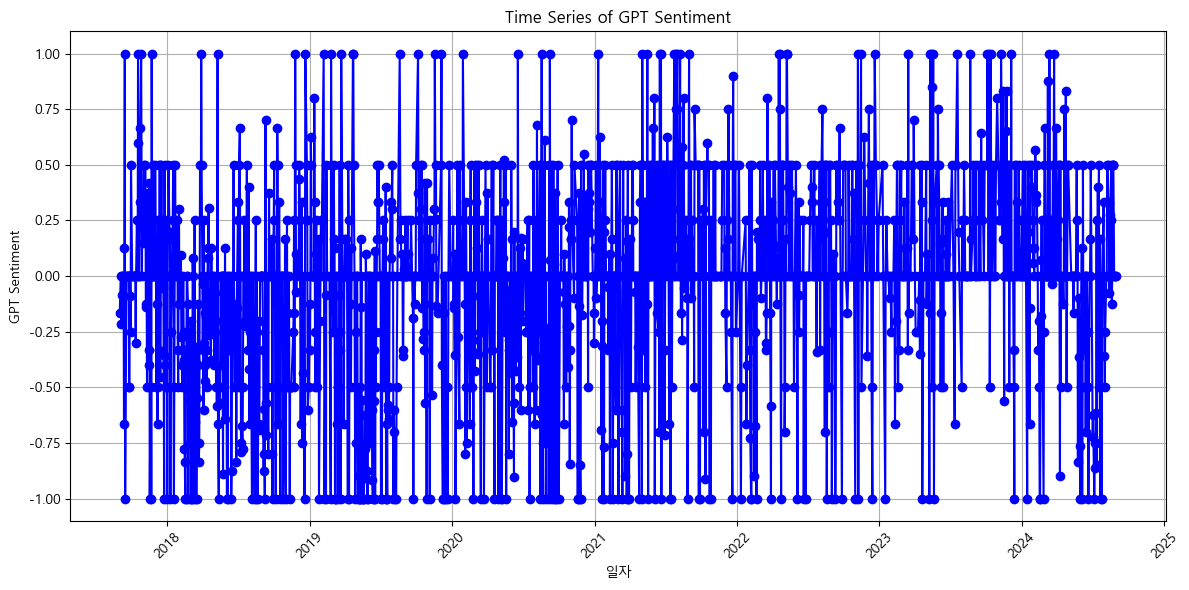

In [14]:
# 'Date' 열을 datetime 타입으로 변환
df_bigkinds.loc[:, '일자'] = pd.to_datetime(df_bigkinds['일자'])

# 날짜별로 'GPT_Sentiment'의 평균을 계산
df_bigkinds_grouped = df_bigkinds.groupby('일자')['GPT_Sentiment'].mean().reset_index()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_bigkinds_grouped['일자'], df_bigkinds_grouped['GPT_Sentiment'], marker='o', linestyle='-', color='b')
plt.title('Time Series of GPT Sentiment')
plt.xlabel('일자')
plt.ylabel('GPT Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [15]:
df_bigkinds_avg = df_bigkinds.groupby('일자', as_index=False)['GPT_Sentiment'].mean()

# 결과 확인
df_bigkinds_avg

,일자,GPT_Sentiment
0,2017-09-01,-0.166667
1,2017-09-04,0.000000
2,2017-09-05,-0.214286
3,2017-09-06,0.000000
4,2017-09-07,-0.083333
...,...,...
1719,2024-08-23,0.500000
1720,2024-08-25,0.000000
1721,2024-08-26,0.000000
1722,2024-08-27,0.000000


In [16]:
# 감정 분석 결과 저장(일자별)
df_bigkinds_avg.to_excel('./Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_Okt_chatgpt_daily.xlsx', index=False)

chatgpt의 경우 다시 평가하는 경우 비용 발생하여 기존에 평가 데이터를 필터링하여 정상 데이터만 추출

In [3]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_Okt_chatgpt.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [4]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,02100101.20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
1,02100101.20170901181209001,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,"형사13부(부장판사,형사13부,성남지원,형사합,대법원,청주지법,형사부,수원지법,서울...","삼성,뇌물,신설,이재용,항소심,형사,배당,부회장,이재용,삼성전자,항소심,재판부,서울...","항소심,부회장,삼성,부장판사,수원지법,서울고법,이재용,정형식,형사13부,서울구치소,...",이재용 삼성전자 부회장(49)의 항소심 재판부가 서울고법 형사13부(부장판사 정형식...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,-1.0,이재용 부회장의 뇌물 혐의와 관련된 항소심 재판 소식은 삼성전자의 주가에 부정적인 ...
2,02100101.20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
3,02100101.20170901163910001,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,"형사13부,재판부,항소심,서울고법","이재용,항소심,13부,서울고법,형사,배당,기일,박근혜,대통령,최순실씨,433억,뇌물...","항소심,부회장,서울고법,정형식,재판부,부장판사,추징금,삼성,관계자,삼성전자,이재용,...",박근혜 전 대통령과 최순실씨에게 433억원의 뇌물을 제공하거나 주기로 약속한 혐의(...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...,0.0,"이재용 부회장의 항소심 재판과 관련된 소식은 불확실성을 높이며, 주가에 중립적인 영..."
4,02100311.20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"형사3부,서울지방경찰청,형사12단독,검찰,국회,대법원,국정원,순천향대,특위,한국마사...","혐의,청문회,건강상태,절차적,하자,무죄,주장,국회,국정,농단,청문회,불출석,혐의,재...","청문회,청와대,비서관,국정원,요구서,건강상태,출석요구서,한국마사회,불출석,재판장,서...",지난해말 국회에서 열린 국정농단 청문회에 제멋대로 불출석한 혐의로 재판에 넘겨진 우...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,0.0,"이 텍스트는 삼성전자의 주가에 대한 명확한 긍정적 또는 부정적 영향을 주지 않으며,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,02100601.20240826182228001,2024-08-26,한국경제,오현우,수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다,사회>의료_건강,IT_과학>과학,NaN,NaN,NaN,...,"현대자동차,마케츠앤드마케츠,삼성전자,ZMP,리프","수술,이송,재활,로봇,의료대,걱정,고령화,필연적,의료,수요,의사,속도,환자,증가,속...","일본,봇핏,마케츠앤드마케츠,17건,스코틀랜드,해리엇와트대,하반신,무인이동로봇,위험도...",고령화는 필연적으로 의료 수요를 키운다. 의사가 늘어나는 속도보다 환자가 증가하는 ...,https://www.hankyung.com/article/2024082667731,NaN,"수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다 수술,이송,재활,로봇,의료대,걱...",수술 이송 재활 다 하는 로봇 의료 대란 걱정 덜었다 수술 이송 재활 로봇 의료 대...,1.0,이 텍스트는 의료 로봇 시장의 급성장과 삼성전자의 보행 보조 로봇 출시 계획을 언급...
6056,02100601.20240826161718002,2024-08-26,한국경제,이해성,"삼성전자 기흥 피폭 작업자, 손에 기준치의 188배 피폭",사회>사회일반,IT_과학>과학,NaN,NaN,NaN,...,"15mSv,한강성심병원,원자력안전위원회,원자력의학원,과학기술정보방송통신위원회,mS,...","삼성전자,기흥,피폭,작업자,기준치,피폭,5월,삼성전자,기흥,캠퍼스,반도체,시설,정비...","방사선,작업자,삼성전자,원안위,인터락,188배,기흥,반도체,기흥캠퍼스,위원회,유효선...",지난 5월 말 삼성전자 기흥캠퍼스에서 반도체 시설 정비 작업 중 피폭된 30대 작업...,https://www.hankyung.com/article/202408266335i,NaN,"삼성전자 기흥 피폭 작업자, 손에 기준치의 188배 피폭 삼성전자,기흥,피폭,작업자...",삼성 기흥 피폭 작업 손 기준 치의 188 배 피폭 삼성 기흥 피폭 작업 기 준치 ...,-1.0,"이 사건은 삼성전자의 방사선 안전 관리에 대한 심각한 우려를 불러일으키며, 주가에 ..."
6057,02100101.20240827181505005,2024-08

In [7]:
# 뉴스 식별자 컬럼에서 '.' 이후의 값만 조회
df_bigkinds['뉴스 식별자'] = df_bigkinds['뉴스 식별자'].str.split('.').str[1]

분석제외 대상과 중복건 제거

In [9]:
df_bigkinds = df_bigkinds[df_bigkinds['분석제외 여부'].isnull()]

In [11]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,20170901174354001,2017-09-01,매일경제,김제이,최순실게이트 청문회 불출석 11인 중 8명 `백수`,사회>사건_사고,정치>청와대,정치>국회_정당,범죄>정치>뇌물수수,NaN,...,"검찰,서울경찰청,국회,비서관,국정원,대법원,서울중앙지법,이화여대,국회증언감정법,청와...","불출석,최순실게이트,청문회,백수,문고리,안봉근,국정홍보비서관,이재만,총무비서관,국정...","비서관,청문회,재판부,최순실,공소사실,문고리,불출석,이화여대,삼성전자,김장자,피고인...",이른바 '문고리 3인방'으로 알려진 안봉근 전 국정홍보비서관과 이재만 전 총무비서관...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"최순실게이트 청문회 불출석 11인 중 8명 `백수` 불출석,최순실게이트,청문회,백수...",최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
1,20170901181209001,2017-09-01,매일경제,정주원,`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당,사회>사건_사고,사회>여성,사회>교육_시험,범죄>정치>뇌물수수,NaN,...,"형사13부(부장판사,형사13부,성남지원,형사합,대법원,청주지법,형사부,수원지법,서울...","삼성,뇌물,신설,이재용,항소심,형사,배당,부회장,이재용,삼성전자,항소심,재판부,서울...","항소심,부회장,삼성,부장판사,수원지법,서울고법,이재용,정형식,형사13부,서울구치소,...",이재용 삼성전자 부회장(49)의 항소심 재판부가 서울고법 형사13부(부장판사 정형식...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"`삼성 뇌물` 이재용 항소심 `신설` 형사13부 배당 삼성,뇌물,신설,이재용,항소심...",삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,-1.0,이재용 부회장의 뇌물 혐의와 관련된 항소심 재판 소식은 삼성전자의 주가에 부정적인 ...
2,20170901141935001,2017-09-01,매일경제,정주원,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정,사회>사건_사고,정치>청와대,정치>국회_정당,NaN,NaN,...,"서울지방경찰청,형사12단독,검찰,국회,서울중앙지법,이화여대,청와대,국정홍보비서관,서...","두문불출,개월,문고리,실세,이재만,안봉근,법정,청문회불,출석,인정,박근혜,대통령,6...","비서관,청문회,이재만,문고리,불출석,청와대,변호인,서울중앙지법,피고인,박평수,박근혜...",박근혜 전 대통령(65 구속기소)의 '문고리 3인방'으로 불렸던 최측근 이재만 전 ...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,두문불출 10개월만에 `문고리 실세` 이재만 안봉근 법정 나와 청문회불출석 인정 두...,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
3,20170901163910001,2017-09-01,매일경제,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일",사회>사건_사고,사회>교육_시험,NaN,범죄>정치>뇌물수수,NaN,...,"형사13부,재판부,항소심,서울고법","이재용,항소심,13부,서울고법,형사,배당,기일,박근혜,대통령,최순실씨,433억,뇌물...","항소심,부회장,서울고법,정형식,재판부,부장판사,추징금,삼성,관계자,삼성전자,이재용,...",박근혜 전 대통령과 최순실씨에게 433억원의 뇌물을 제공하거나 주기로 약속한 혐의(...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"이재용 항소심, 서울고법 형사 13부에 배당 이달중 첫 기일 이재용,항소심,13부,...",이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...,0.0,"이재용 부회장의 항소심 재판과 관련된 소식은 불확실성을 높이며, 주가에 중립적인 영..."
4,20170901153936001,2017-09-01,서울경제,장주영 기자,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장",정치>국회_정당,사회>사건_사고,정치>청와대,NaN,NaN,...,"형사3부,서울지방경찰청,형사12단독,검찰,국회,대법원,국정원,순천향대,특위,한국마사...","혐의,청문회,건강상태,절차적,하자,무죄,주장,국회,국정,농단,청문회,불출석,혐의,재...","청문회,청와대,비서관,국정원,요구서,건강상태,출석요구서,한국마사회,불출석,재판장,서...",지난해말 국회에서 열린 국정농단 청문회에 제멋대로 불출석한 혐의로 재판에 넘겨진 우...,http://www.sedaily.com/NewsView/1OKUY3ELL1,NaN,"청문회 불출석 혐의, 건강상태-절차적 하자로 '무죄' 주장 혐의,청문회,건강상태,절...",청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,0.0,"이 텍스트는 삼성전자의 주가에 대한 명확한 긍정적 또는 부정적 영향을 주지 않으며,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,20240823175054001,2024-08-23,한국경제,신정은/김형규,현대차가 쏘아올린 산업계 '재고용 바람',경제>자동차,경제>산업_기업,사회>노동_복지,NaN,NaN,...,"기아,현대차·기아,현대제철,삼성전자,도요타,한국경영자총협회,포스코,한국GM,현대자동...","현대차,바람,산업,정년,생산,근로자,재고용,움직임,자동차업,전반,확산,근로자,은퇴,...","재고용,근로자,현대차,한국,기술직,정년퇴직자,자동차업계,관계자,65세,기술자,계약직...",정년을 맞은 생산직 근로자를 재고용하는 움직임이 자동차업계 전반으로 확산하고 있다....,https://www.hankyung.com/article/2024082322801,NaN,"현대차가 쏘아올린 산업계 '재고용 바람' 현대차,바람,산업,정년,생산,근로자,재고용...",현대차 쏘아 올린 산업 계 재고용 바람 현대차 바람 산업 정년 생산 근로자 재고용 ...,0.5,"이 텍스트는 자동차 산업의 재고용 확대와 관련된 긍정적인 소식을 담고 있어, 삼성전..."
6054,20240825142511001,2024-08-25,매일경제,박재영 기자(jyp8909@mk.co.kr),"부산국제마케팅광고제, 올해 그랑프리 수상작 발표",사회>사회일반,NaN,NaN,NaN,NaN,...,"UN WOMEN,유일,Japan,삼성전자,법원,벡스코,아랍에미리트,종교법원,INC....","부산국제마케팅광고제,그랑프리,수상작,제품,서비스,일본,철도,어린이,청첩장,공익광고,...","파키스탄,일본,공익광고,부산,수상작,청첩장,810만,덴츠,기차역,ai,이슬람,아시아...",제품 서비스 부문에 ‘나의 일본 철도’ \n‘어린이 청첩장’ 공익광고 부문 수상 \...,http://www.mk.co.kr/article/11100820,NaN,"부산국제마케팅광고제, 올해 그랑프리 수상작 발표 부산국제마케팅광고제,그랑프리,수상작...",부산 국제 마케팅 광고 올해 그랑프리 수상작 발표 부산 국제 마케팅 광고 그랑프리 ...,0.0,"이 텍스트는 삼성전자의 주가에 중립적인 영향을 미칠 것으로 보이며, 광고 수상과 관..."
6055,20240826182228001,2024-08-26,한국경제,오현우,수술 이송 재활 다 하는 로봇 의료대란 걱정 덜었다,사회>의

뉴스 식별자 최소값 기준으로 제목_키워드_전처리후 그룹핑

In [13]:
# 그룹핑할 컬럼 리스트
group_columns = ['제목_키워드_전처리후_Okt']

# 각 그룹에서 뉴스 식별자 컬럼의 최소값을 유지
df_bigkinds2 = df_bigkinds.groupby(group_columns, as_index=False).agg({'뉴스 식별자': 'min'})

In [15]:
df_bigkinds2

,제목_키워드_전처리후_Okt,뉴스 식별자
0,- 3 주 째 대면 불발 에도 이재용 기소 조만간 결정 날 듯 3 주 대면 불발 이...,20200715150951001
1,- TV PD 수첩 암페타민 밀 반입 박봄 은 입건 유예 됐나 PD 수첩 박봄 암페...,20180425075416001
2,- 삼성 26일 수사 심의 위 화 력 집중 삼성 수사 심의 위 화 력 집중 부회장 ...,20200625175758001
3,1 078일 만 실형 선고 이재용 정면 응시 한 채 한동안 깊은 침묵 1 078일 ...,20210118151417001
4,1 노총 잃은 한국 노총 정부 정책 협약 재 검토 1 노총 한국 노총 정부 재 검토...,20200107211129001
...,...,...
5475,흔들리는 직장인 10 명 중 7 명 이직 퇴사 고민 직장인 10 명 이직 퇴사 고민...,20210829174514001
5476,희 대의 사기 큰손 장영자 아시나요 번째 사기 징역 4년 확정 희대 사기 큰손 장영...,20200409114505001
5477,희귀 병 딸 도와준 이재용 사칭 계정 사건 전말 알 고 보니 계정 이재용 사칭 사건...,20230612114647001
5478,희망 성화 봉송 로봇다리 수영 선수 김세진 참여 희망 성화 봉송 로봇다리 수영 선수...,20171112074911001


In [17]:
# 필요한 컬럼만 선택하여 두 데이터프레임 병합
big_kinds_sentiment = pd.merge(
    df_bigkinds[['제목_키워드_전처리후_Okt', '뉴스 식별자','일자','GPT_Sentiment','Predicted_Text']],
    df_bigkinds2[['제목_키워드_전처리후_Okt', '뉴스 식별자']],
    on=['제목_키워드_전처리후_Okt', '뉴스 식별자'],
    how='inner'
)
big_kinds_sentiment = big_kinds_sentiment[['뉴스 식별자', '일자', '제목_키워드_전처리후_Okt', 'GPT_Sentiment', 'Predicted_Text']]
big_kinds_sentiment

,뉴스 식별자,일자,제목_키워드_전처리후_Okt,GPT_Sentiment,Predicted_Text
0,20170901174354001,2017-09-01,최 순 실 게이트 청문회 불 출석 11 인 중 8 명 백수 불 출석 최 순 실 게이...,0.0,"이 사건은 삼성과 관련된 정치적 불확실성을 증가시키고 있으며, 주가에 미치는 영향이..."
1,20170901181209001,2017-09-01,삼성 뇌물 이재용 항소심 신설 형사 13 부 배당 삼성 뇌물 신설 이재용 항소심 형...,-1.0,이재용 부회장의 뇌물 혐의와 관련된 항소심 재판 소식은 삼성전자의 주가에 부정적인 ...
2,20170901141935001,2017-09-01,두문불출 10 개월 만에 문 고리 실세 이재만 안봉 근 법정 나와 청문회 불 출석 ...,0.0,"이 텍스트는 정치적 사건과 관련된 내용으로, 삼성전자의 주가에 직접적인 영향을 미치..."
3,20170901163910001,2017-09-01,이재용 항소심 서울 고법 형사 13 부 배당 달 중 첫 기일 이재용 항소심 13 부...,0.0,"이재용 부회장의 항소심 재판과 관련된 소식은 불확실성을 높이며, 주가에 중립적인 영..."
4,20170901153936001,2017-09-01,청문회 불 출석 혐의 건강 상태 - 절차 적 하자 무죄 주장 혐의 청문회 건강 상태...,0.0,"이 텍스트는 삼성전자의 주가에 대한 명확한 긍정적 또는 부정적 영향을 주지 않으며,..."
...,...,...,...,...,...
5475,20240823175054001,2024-08-23,현대차 쏘아 올린 산업 계 재고용 바람 현대차 바람 산업 정년 생산 근로자 재고용 ...,0.5,"이 텍스트는 자동차 산업의 재고용 확대와 관련된 긍정적인 소식을 담고 있어, 삼성전..."
5476,20240825142511001,2024-08-25,부산 국제 마케팅 광고 올해 그랑프리 수상작 발표 부산 국제 마케팅 광고 그랑프리 ...,0.0,"이 텍스트는 삼성전자의 주가에 중립적인 영향을 미칠 것으로 보이며, 광고 수상과 관..."
5477,20240826182228001,2024-08-26,수술 이송 재활 다 하는 로봇 의료 대란 걱정 덜었다 수술 이송 재활 로봇 의료 대...,1.0,이 텍스트는 의료 로봇 시장의 급성장과 삼성전자의 보행 보조 로봇 출시 계획을 언급...
5478,20240826161718002,2024-08-26,삼성 기흥 피폭 작업 손 기준 치의 188 배 피폭 삼성 기흥 피폭 작업 기 준치 ...,-1.0,"이 사건은 삼성전자의 방사선 안전 관리에 대한 심각한 우려를 불러일으키며, 주가에 ..."


In [19]:
big_kinds_sentiment.to_excel('./Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_Okt_chatgpt_filter.xlsx', index=False)

In [21]:
big_kinds_sentiment_avg = big_kinds_sentiment.groupby('일자', as_index=False)['GPT_Sentiment'].mean()
# 소수점 1자리로 반올림
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].round(1)
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].apply(lambda x: 0 if x == -0.0 else x)
# 결과 확인
big_kinds_sentiment_avg

,일자,GPT_Sentiment
0,2017-09-01,-0.2
1,2017-09-04,0.0
2,2017-09-05,-0.2
3,2017-09-06,0.0
4,2017-09-07,-0.1
...,...,...
1646,2024-08-22,0.5
1647,2024-08-23,0.5
1648,2024-08-25,0.0
1649,2024-08-26,0.0


In [23]:
# 감정 분석 결과 저장(일자별)
big_kinds_sentiment_avg.to_excel('./Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_Okt_chatgpt_daily_filter.xlsx', index=False)

###### 